In [1]:
%matplotlib inline
from pymc3 import *
import pymc3 as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a = 1; b = 2;
size = 10;
np.random.seed(108727)
x = np.random.normal(0,.4,size = 10)
x.sort()
#x = np.linspace(-1,1,size+1)[:size] + np.random.uniform(0,0.1,size)
#x = np.random.uniform(-1,1,size)

true_y = a + b * x**2

# add noise
y = true_y + np.random.normal(scale=1, size=size)

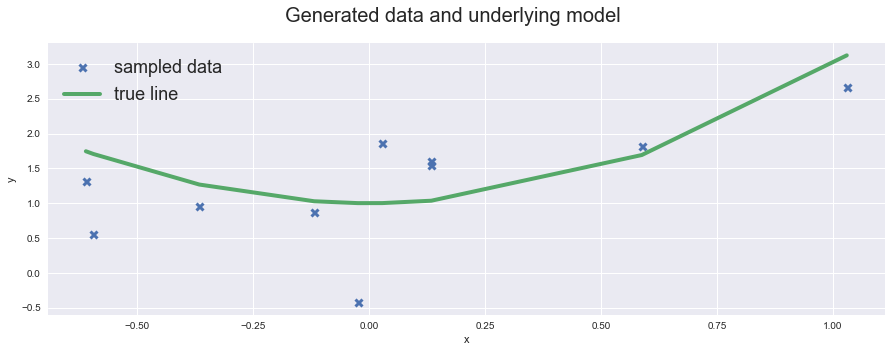

In [3]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
fig.suptitle('Generated data and underlying model', fontsize = 20)
ax.plot(x, y, 'x', label='sampled data', mew = 3)
ax.plot(x, true_y, label='true line', lw=4.)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0, fontsize = 18);

In [4]:
with Model() as m1:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 2)
    mu = Deterministic('mu', beta[0] + beta[1] * x)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t1 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 18.14:   3%|▎         | 6949/200000 [00:01<00:27, 6912.66it/s] 
Convergence archived at 7400
Interrupted at 7,400 [3%]: Average Loss = 29.161
100%|██████████| 3500/3500 [00:08<00:00, 398.73it/s]


In [5]:
betasamps = t1[500:]['beta']

In [6]:
h = np.linspace(-1.5, 1.5, 100)

In [7]:
H = np.c_[np.ones(100),h]
yhat = np.matmul(betasamps, H.T)
ml = pm.find_MAP(model = m1)
ymap = np.matmul(ml['beta'],H.T)

ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

X = np.array([np.ones(10),x]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h]).T, betaml)

Optimization terminated successfully.
         Current function value: 15.582424
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16


In [8]:
def plot_regression(yhat, ymap, yml, ysamps):
    plt.figure(figsize=(15, 5));
    
    plt.fill_between(h, yhat[0], yhat[2], facecolor='gray', alpha = 0.4, zorder = 1);
    plt.plot(h, yhat[1], label = 'Median curve', lw=3., c='b', linestyle=':', zorder = 1);
    plt.plot(h, ymap, label='MAP curve', lw=3., c='g', zorder = 1);
    plt.plot(h, yml, label='MLE curve', lw=3., c='k', zorder = 1);
    plt.plot(h, ysamps.mean(axis=1), c = 'orange', lw = 3, label = 'Sample mean',zorder = 1);
    plt.plot(h, ysamps[:,0], label = 'Sample line',c = 'k', alpha = .3, linestyle = '--', zorder = 1);
    plt.plot(h, ysamps[:,1:], c = 'k', alpha = .3, linestyle = '--', zorder = 1);
#    plt.plot(x, true_y, label='true regression line', lw=2., c='r', linestyle ='--', zorder = 1);
    plt.scatter(x, y,  marker = '.', c = 'r', s = 150, zorder = 2);
    
    plt.title('Posterior predictive regression lines', fontsize = 20)
    plt.legend(bbox_to_anchor=(0.5, -0.2), loc=9,
                   ncol=2, mode="expand", borderaxespad=0., fontsize = 18);
    plt.ylim([-1,10])

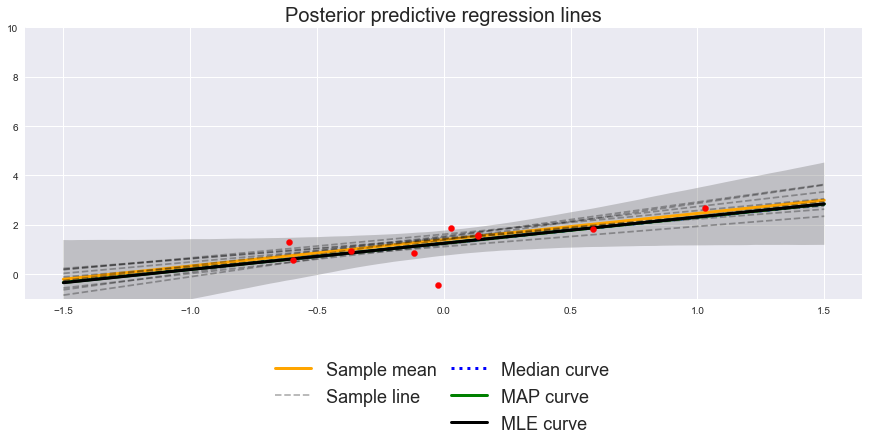

In [9]:
plot_regression(yhat, ymap, yml, ysamps)

In [10]:
with Model() as m2:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 3)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t2 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 21.033:   2%|▏         | 4872/200000 [00:00<00:31, 6160.08it/s]
Convergence archived at 5500
Interrupted at 5,500 [2%]: Average Loss = 33.804
100%|██████████| 3500/3500 [00:09<00:00, 360.93it/s]


In [15]:
betasamps = t2[500:]['beta']
degree = t2[500:]['beta'].shape[1]

H = np.c_[H,h**(degree-1)]
yhat = np.matmul(betasamps, H.T)
ml = pm.find_MAP(model = m2)
ymap = np.matmul(ml['beta'],H.T)

ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

X = np.array([np.ones(10),x, x**2]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2]).T, betaml)

Optimization terminated successfully.
         Current function value: 17.523443
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18


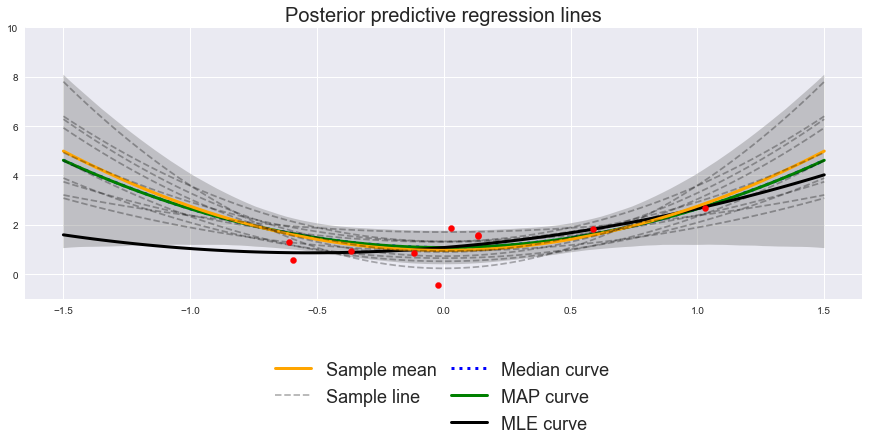

In [16]:
plot_regression(yhat, ymap, yml, ysamps)

In [17]:
with Model() as m3:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 4)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t3 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 22.713:   3%|▎         | 5028/200000 [00:00<00:34, 5590.69it/s]
Convergence archived at 5600
Interrupted at 5,600 [2%]: Average Loss = 33.459
100%|██████████| 3500/3500 [00:19<00:00, 180.64it/s]


In [18]:
betasamps = t3[500:]['beta']
degree = betasamps.shape[1]

H = np.c_[H,h**(degree-1)]
yhat = np.matmul(betasamps, H.T)
ml = pm.find_MAP(model = m3)
ymap = np.matmul(ml['beta'],H.T)

ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

X = np.array([np.ones(10),x, x**2, x**3]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3]).T, betaml)

Optimization terminated successfully.
         Current function value: 19.927454
         Iterations: 15
         Function evaluations: 19
         Gradient evaluations: 19


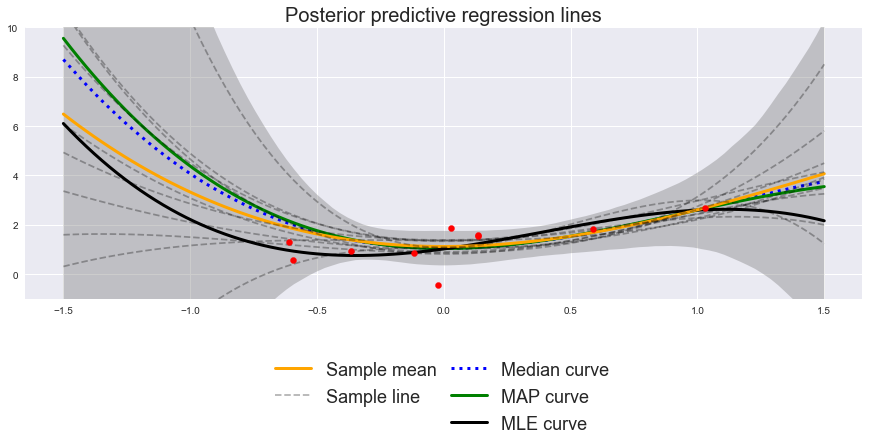

In [19]:
plot_regression(yhat, ymap, yml,ysamps)

In [20]:
with Model() as m4:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 5)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 + beta[4] * x**4)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t4 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 25.19:   2%|▏         | 4341/200000 [00:00<00:36, 5426.77it/s] 
Convergence archived at 4900
Interrupted at 4,900 [2%]: Average Loss = 36.534
 94%|█████████▍| 3288/3500 [00:30<00:01, 113.30it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 1 contains 12 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 3490/3500 [00:32<00:00, 115.25it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 4 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [00:32<00:00, 107.18it/s]
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/

In [21]:
betasamps = t4[500:]['beta']
degree = betasamps.shape[1]

H = np.c_[H,h**(degree-1)]
yhat = np.matmul(betasamps, H.T)
ml = pm.find_MAP(model = m4)
ymap = np.matmul(ml['beta'],H.T)

ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

X = np.array([np.ones(10),x, x**2, x**3, x**4]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3, h**4]).T, betaml)

Optimization terminated successfully.
         Current function value: 22.425846
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23


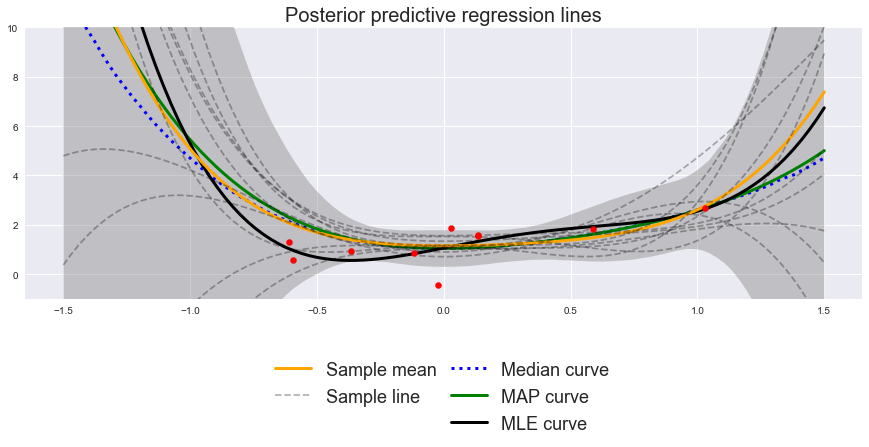

In [22]:
plot_regression(yhat, ymap, yml, ysamps)

In [23]:
with Model() as m5:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 6)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 + beta[4] * x**4 + beta[5] * x**5)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t5 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 25.602:   3%|▎         | 5661/200000 [00:01<00:38, 5068.39it/s]
Convergence archived at 5900
Interrupted at 5,900 [2%]: Average Loss = 37.266
100%|█████████▉| 3496/3500 [00:41<00:00, 69.61it/s] /Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 37 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [00:41<00:00, 84.14it/s]
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 1 contains 37 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Cha

In [24]:
betasamps = t5[500:]['beta']
degree = betasamps.shape[1]

H = np.c_[H,h**(degree-1)]
yhat = np.matmul(betasamps, H.T)
ml = pm.find_MAP(model = m5)
ymap = np.matmul(ml['beta'],H.T)

ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)
    
X = np.array([np.ones(10),x, x**2, x**3, x**4, x**5]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3, h**4, h**5]).T, betaml)    

Optimization terminated successfully.
         Current function value: 24.951729
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29


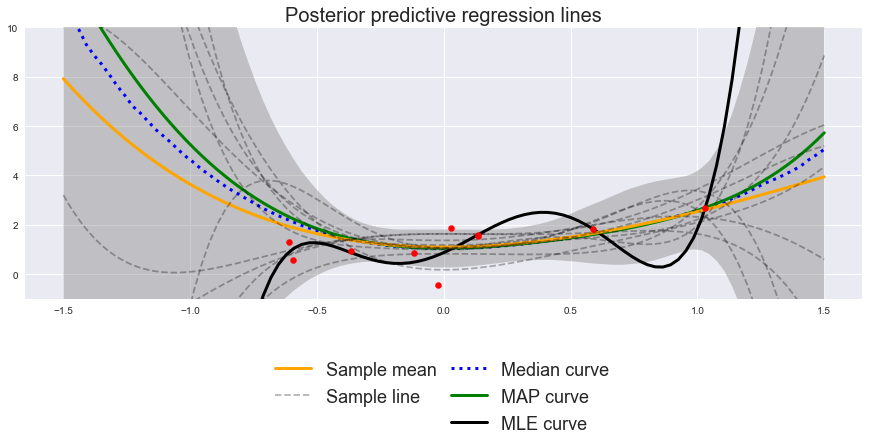

In [25]:
plot_regression(yhat, ymap, yml, ysamps)

In [26]:
with Model() as m6:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5, shape = 7)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 + beta[4] * x**4 + beta[5] * x**5 + beta[6] * x**6)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    # Inference! ---------------------------------------------------------------
    t6 = sample(3000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 27.794:   3%|▎         | 5445/200000 [00:01<00:35, 5424.46it/s]
Convergence archived at 5900
Interrupted at 5,900 [2%]: Average Loss = 39.13
100%|█████████▉| 3497/3500 [00:51<00:00, 71.93it/s] /Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 89 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [00:51<00:00, 67.40it/s]
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 1 contains 37 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chai

In [27]:
betasamps = t6[500:]['beta']
degree = betasamps.shape[1]

H = np.c_[H,h**(degree-1)]
yhat = np.matmul(betasamps, H.T)
ml = pm.find_MAP(model = m6)
ymap = np.matmul(ml['beta'],H.T)
ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

X = np.array([np.ones(10),x, x**2, x**3, x**4, x**5, x**6]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3, h**4, h**5, h**6]).T, betaml)

Optimization terminated successfully.
         Current function value: 27.466853
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28


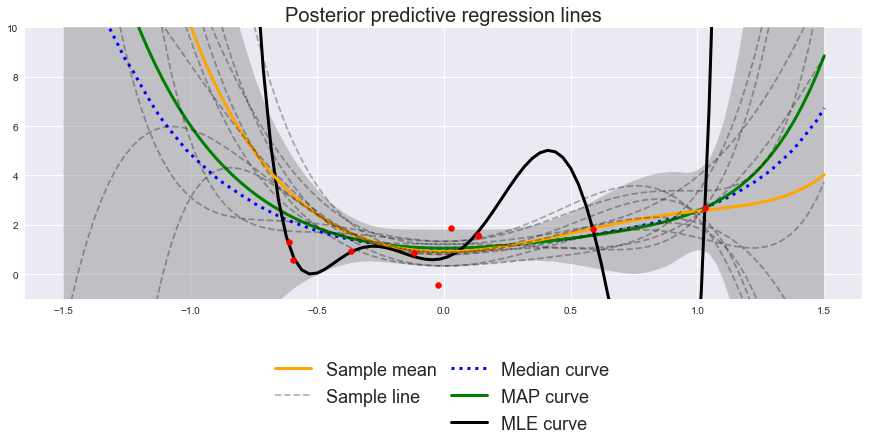

In [ ]:
plot_regression(yhat, ymap, yml, ysamps)

In [ ]:
with Model() as m7:
    # Define priors ------------------------------------------------------------
    sigma = Exponential('sigma', 1)
    beta = Normal('beta', 0, sd=5e0, shape = 8)
    mu = Deterministic('mu', beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 + beta[4] * x**4 + beta[5] * x**5 + beta[6] * x**6 + beta[7] * x**7)
    # Define likelihood --------------------------------------------------------
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y)
    
with m7:    
    # Inference! ---------------------------------------------------------------
    start = pm.find_MAP(model = m7)
    t7 = sample(3000, njobs=3)

Optimization terminated successfully.
         Current function value: 29.991660
         Iterations: 29
         Function evaluations: 35

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 29.549:   3%|▎         | 5486/200000 [00:01<00:37, 5208.12it/s]
Convergence archived at 5700
Interrupted at 5,700 [2%]: Average Loss = 41.24



         Gradient evaluations: 35


 95%|█████████▌| 3341/3500 [01:06<00:03, 50.96it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 1 contains 103 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 3497/3500 [01:09<00:00, 51.41it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 31 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [01:10<00:00, 49.99it/s]


In [ ]:
betasamps = t7[500:]['beta']
degree = betasamps.shape[1]

H = np.c_[H,h**(degree-1)]
yhat = np.matmul(betasamps, H.T)
ml = pm.find_MAP(model = m7)
ymap = np.matmul(ml['beta'],H.T)
ysamps = yhat[np.random.randint(0,7500,10),:].T
yhat = np.percentile(yhat, [2.5,50,97.5],axis = 0)

X = np.array([np.ones(10),x, x**2, x**3, x**4, x**5, x**6, x**7]).T
betaml = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y))
yml = np.matmul(np.array([np.ones(100),h, h**2, h**3, h**4, h**5, h**6, h**7]).T, betaml)

In [ ]:
plot_regression(yhat, ymap, yml, ysamps)